In [1]:
import pandas as pd
import numpy as np

In [2]:
from scipy import stats

In [3]:
bank = pd.read_excel('bank-full.xlsx')

In [ ]:
###############################################
####################################   교차분석

In [11]:
crosstab = pd.crosstab(bank.education, bank.marital, margins=1) # margins는 All(총합)을 보여준다.
crosstab

marital,divorced,married,single,All
education,,,,
primary,752,5246,853,6851
secondary,2815,13770,6617,23202
tertiary,1471,7038,4792,13301
unknown,169,1160,528,1857
All,5207,27214,12790,45211


In [7]:
pd.crosstab(bank.education, bank.marital, margins=True, normalize=True).style.background_gradient(cmap='summer_r')

marital,divorced,married,single,All
education,,,,
primary,0.0166331,0.116034,0.0188671,0.151534
secondary,0.0622636,0.304572,0.146358,0.513194
tertiary,0.0325363,0.15567,0.105992,0.294198
unknown,0.00373803,0.0256575,0.0116786,0.0410741
All,0.115171,0.601933,0.282896,1


In [12]:
stats.chi2_contingency(crosstab) #순서대로 카이스퀘어값, p값, 기대빈도값
# p값의 뒤에 e-279는 4.1 에서 소수점은 279번 앞으로 땡기는 의미. 거의 0에 가까운 것.
# 우리가 갖고 있는 것은 관측빈도였고, 이것은 기대빈도이다.
# corsstab에 style을 넣으면 안됨

(1337.5098721977347,
 4.1098842106162984e-279,
 12,
 array([[  789.03711486,  4123.8440645 ,  1938.11882064,  6851.        ],
        [ 2672.19955321, 13966.05312866,  6563.74731813, 23202.        ],
        [ 1531.89062396,  8006.31293269,  3762.79644334, 13301.        ],
        [  213.87270797,  1117.78987415,   525.33741789,  1857.        ],
        [ 5207.        , 27214.        , 12790.        , 45211.        ]]))

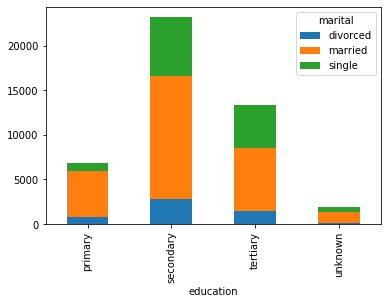

In [24]:
%matplotlib inline

ct = pd.crosstab(bank.education, bank.marital)
ct.plot.bar(stacked=True)
# 범주별로 차이가 얼마 나는지 볼 수 있다.

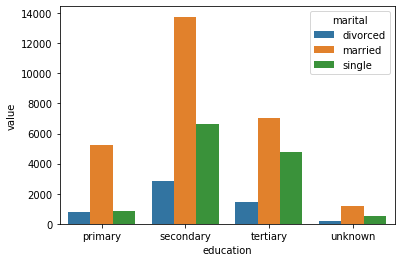

In [28]:
import seaborn as sns
stacked = ct.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.education, y=stacked.value, hue=stacked.marital)

In [ ]:
########################################################
# bank데이터의 y변수와 이산형 변수를 이용해 교차분석하기

In [33]:
crosstab_marital_y = pd.crosstab(bank.marital, bank.y, margins=1)
stats.chi2_contingency(crosstab_marital_y)


(238.92350616407606,
 3.8274224361043847e-47,
 8,
 array([[ 6049.5371038 ,   801.4628962 ,  6851.        ],
        [20487.71856407,  2714.28143593, 23202.        ],
        [11744.98511424,  1556.01488576, 13301.        ],
        [ 1639.75921789,   217.24078211,  1857.        ],
        [39922.        ,  5289.        , 45211.        ]]))

In [34]:
crosstab_education_y = pd.crosstab(bank.education, bank.y, margins=1)
stats.chi2_contingency(crosstab_education_y)

(238.92350616407606,
 3.8274224361043847e-47,
 8,
 array([[ 6049.5371038 ,   801.4628962 ,  6851.        ],
        [20487.71856407,  2714.28143593, 23202.        ],
        [11744.98511424,  1556.01488576, 13301.        ],
        [ 1639.75921789,   217.24078211,  1857.        ],
        [39922.        ,  5289.        , 45211.        ]]))

In [36]:
crosstab_job_y = pd.crosstab(bank.job, bank.y, margins=1)
stats.chi2_contingency(crosstab_job_y)

(836.1054877471965,
 4.85219268619098e-161,
 24,
 array([[4.56607158e+03, 6.04928424e+02, 5.17100000e+03],
        [8.59350388e+03, 1.13849612e+03, 9.73200000e+03],
        [1.31304360e+03, 1.73956404e+02, 1.48700000e+03],
        [1.09493884e+03, 1.45061158e+02, 1.24000000e+03],
        [8.35155772e+03, 1.10644228e+03, 9.45800000e+03],
        [1.99914640e+03, 2.64853598e+02, 2.26400000e+03],
        [1.39428099e+03, 1.84719006e+02, 1.57900000e+03],
        [3.66804512e+03, 4.85954878e+02, 4.15400000e+03],
        [8.28268253e+02, 1.09731747e+02, 9.38000000e+02],
        [6.70826644e+03, 8.88733560e+02, 7.59700000e+03],
        [1.15056880e+03, 1.52431200e+02, 1.30300000e+03],
        [2.54308376e+02, 3.36916237e+01, 2.88000000e+02],
        [3.99220000e+04, 5.28900000e+03, 4.52110000e+04]]))

In [37]:
crosstab_housing_y = pd.crosstab(bank.housing, bank.y, margins=1)
stats.chi2_contingency(crosstab_housing_y)

(875.6937181054402,
 3.074950925518164e-188,
 4,
 array([[17731.82813917,  2349.17186083, 20081.        ],
        [22190.17186083,  2939.82813917, 25130.        ],
        [39922.        ,  5289.        , 45211.        ]]))

In [39]:
crosstab_loan_y = pd.crosstab(bank.loan, bank.y, margins=1)
stats.chi2_contingency(crosstab_loan_y)

(210.19493419602674,
 2.4124315150387255e-44,
 4,
 array([[33525.4379244,  4441.5620756, 37967.       ],
        [ 6396.5620756,   847.4379244,  7244.       ],
        [39922.       ,  5289.       , 45211.       ]]))

In [40]:
##########################################################
################################################# 상관분석

In [42]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [45]:
bank.head() # 데이터 불러오고 가장 위의 5행을 봐줘야 한다.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

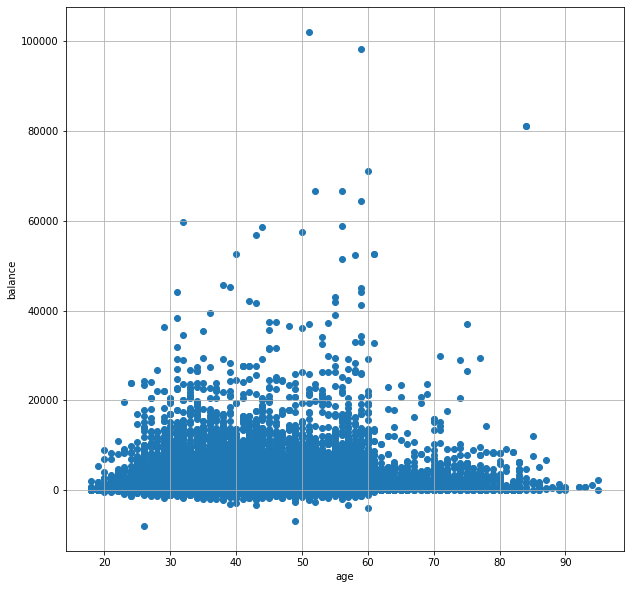

In [51]:
plt.figure(figsize=(10,10))
plt.scatter(bank.age, bank.balance)
plt.xlabel('age')
plt.ylabel('balance')
plt.grid()
plt.show()

# 아까 jointplot할때는 위에 히스토그램이 나왔지만, 여기는 산점도만 나온다.

In [13]:
corr = stats.pearsonr(bank.age, bank.balance)
corr
# 앞에 나온게 상관계수, 뒤에 나온것이 p-value

(0.09778273937134746, 1.8469874949280991e-96)

In [59]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [61]:
corr2 = stats.pearsonr(bank.duration, bank.balance)
corr2

(0.02156038049466903, 4.545003068952218e-06)

In [64]:
corr3 = stats.pearsonr(bank.pdays, bank.previous)
corr3

(0.45481963548050097, 0.0)

In [73]:
bank_ctn = bank[["age","balance","duration","campaign","pdays","previous"]]
bank_ctn.head()
bank_ctn.corr(method="pearson") # 모든 연속형 변수 상관관계 알아보기; p-value는 모른다.

,age,balance,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.021560,-0.014578,0.003435,0.016674
duration,-0.004648,0.021560,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,0.001203,-0.032855,0.454820,1.000000


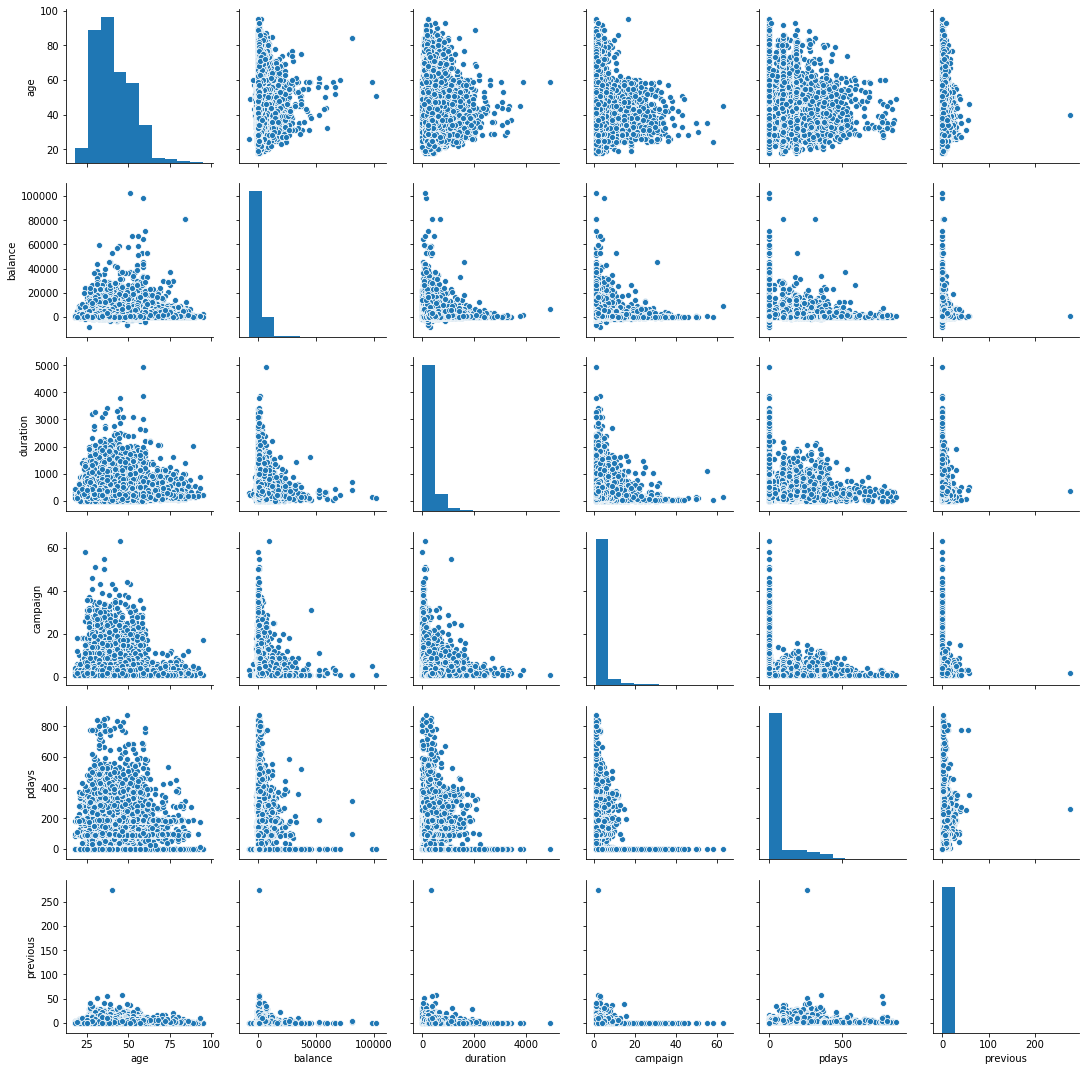

In [75]:
sns.pairplot(bank_ctn) # 연속형의 히스토그램과 산점도 나타내기 

In [79]:
bank.groupby(bank['marital']).describe().T # 뒤에 .T를 붙이는건 세로로 확인하는 것이다.

marital             divorced       married         single
age      count   5207.000000  27214.000000   12790.000000
         mean      45.782984     43.408099      33.703440
         std       10.124719     10.264452       7.603166
         min       24.000000     20.000000      18.000000
         25%       38.000000     35.000000      29.000000
         50%       45.000000     42.000000      32.000000
         75%       53.000000     51.000000      37.000000
         max       95.000000     95.000000      86.000000
balance  count   5207.000000  27214.000000   12790.000000
         mean    1178.872287   1425.925590    1301.497654
         std     2926.453439   3140.962597    2875.317791
         min    -4057.000000  -6847.000000   -8019.000000
         25%       25.000000     75.000000      90.000000
         50%      348.000000    477.000000     437.000000
         75%     1205.500000   1515.000000    1335.750000
         max    66721.000000  98417.000000  102127.000000
day      count   5207.000000  27214.000000   12790.000000
         mean      15.796428     15.854487      15.708210
         std        8.262271      8.226741       8.546200
         min        1.000000      1.000000       1.000000
         25%        8.000000      8.000000       8.000000
         50%       16.000000     16.000000      16.000000
         75%       21.000000     21.000000      22.000000
         max       31.000000     31.000000      31.000000
duration count   5207.000000  27214.000000   12790.000000
         mean     262.517188    253.412765     266.497967
         std      263.807016    253.164471     263.845968
         min        1.000000      0.000000       2.000000
         25%      104.000000    102.000000     106.000000
         50%      178.000000    177.000000     187.000000
         75%      322.000000    312.000000     332.000000
         max     3094.000000   4918.000000    3785.000000
campaign count   5207.000000  27214.000000   12790.000000
         mean       2.630882      2.842875       2.649805
         std        2.796826      3.146143       3.106302
         min        1.000000      1.000000       1.000000
         25%        1.000000      1.000000       1.000000
         50%        2.000000      2.000000       2.000000
         75%        3.000000      3.000000       3.000000
         max       37.000000     63.000000      58.000000
pdays    count   5207.000000  27214.000000   12790.000000
         mean      41.001728     37.950467      44.652385
         std      102.327149     97.227581     105.041069
         min       -1.000000     -1.000000      -1.000000
         25%       -1.000000     -1.000000      -1.000000
         50%       -1.000000     -1.000000      -1.000000
         75%       -1.000000     -1.000000      -1.000000
         max      871.000000    842.000000     850.000000
previous count   5207.000000  27214.000000   12790.000000
         mean       0.551373      0.556552       0.642690
         std        1.811625      2.478797       2.083432
         min        0.000000      0.000000       0.000000
         25%        0.000000      0.000000       0.000000
         50%        0.000000      0.000000       0.000000
         75%        0.000000      0.000000       0.000000
         max       30.000000    275.000000      51.000000

In [80]:
bank.groupby('marital')[['age']].describe()

age                                                    
            count       mean        std   min   25%   50%   75%   max
marital                                                              
divorced   5207.0  45.782984  10.124719  24.0  38.0  45.0  53.0  95.0
married   27214.0  43.408099  10.264452  20.0  35.0  42.0  51.0  95.0
single    12790.0  33.703440   7.603166  18.0  29.0  32.0  37.0  86.0

In [83]:
divorced = bank[bank['marital']=='divorced'].age.values
married=bank[bank['marital']=='married'].age.values
single=bank[bank['marital']=='single'].age.values
print(divorced)
print(married)
print(single)

[42 41 57 ... 36 75 71]
[58 33 47 ... 72 57 37]
[44 33 28 ... 34 23 25]


In [84]:
stats.f_oneway(divorced,married,single)

F_onewayResult(statistic=5228.732920484922, pvalue=0.0)

In [146]:
# 사후검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [120]:
tukey = pairwise_tukeyhsd(endog=bank['age'],
                         groups = bank['marital'], alpha=0.05)
tukey.summary()
# reject가 True인 것은 차이가 있다는 것을 의미(대립가설 채택)

group1,group2,meandiff,p-adj,lower,upper,reject
divorced,married,-2.3749,0.001,-2.7142,-2.0356,True
divorced,single,-12.0795,0.001,-12.4483,-11.7108,True
married,single,-9.7047,0.001,-9.9451,-9.4642,True


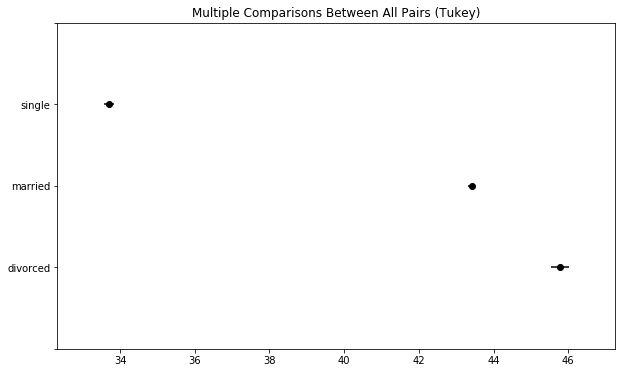

In [89]:
fig = tukey.plot_simultaneous()

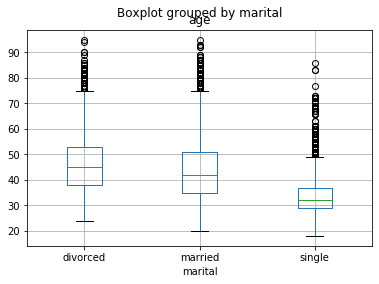

In [91]:
bank.boxplot(column="age", by="marital")

{'whiskers': [<matplotlib.lines.Line2D at 0x22d40f7f848>,
 'caps': [<matplotlib.lines.Line2D at 0x22d40fbe388>,
 'boxes': [<matplotlib.lines.Line2D at 0x22d40f7f9c8>,
 'medians': [<matplotlib.lines.Line2D at 0x22d40fc2408>,
 'fliers': [<matplotlib.lines.Line2D at 0x22d40fc2c48>,
 'means': []}

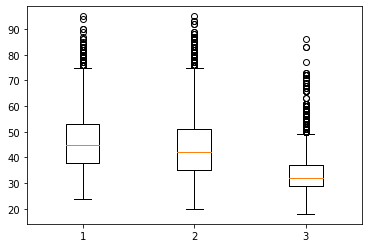

In [92]:
plt.boxplot((divorced,married,single))

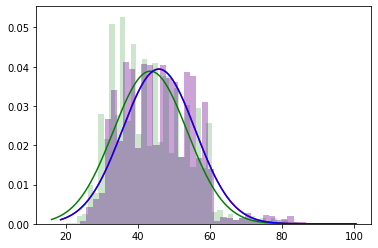

In [104]:
sns.distplot(divorced, kde=False, hist_kws = {'color':'r', 'alpha':0.2}, fit_kws={"color":"r"}, fit=stats.norm) # kde는 밀도함수를 의미
sns.distplot(married, kde=False, hist_kws = {'color':'g', 'alpha':0.2}, fit_kws={"color":"g"}, fit=stats.norm)
sns.distplot(divorced, kde=False, hist_kws = {'color':'b', 'alpha':0.2}, fit_kws={"color":"b"}, fit=stats.norm)

In [105]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [135]:
bank.groupby(bank['y']).describe()

age                                                      balance  \
       count       mean        std   min   25%   50%   75%   max    count   
y                                                                           
no   39922.0  40.838986  10.172662  18.0  33.0  39.0  48.0  95.0  39922.0   
yes   5289.0  41.670070  13.497781  18.0  31.0  38.0  50.0  95.0   5289.0   

                  ... pdays        previous                                \
            mean  ...   75%    max    count      mean       std  min  25%   
y                 ...                                                       
no   1303.714969  ...  -1.0  871.0  39922.0  0.502154  2.256771  0.0  0.0   
yes  1804.267915  ...  98.0  854.0   5289.0  1.170354  2.553272  0.0  0.0   

                      
     50%  75%    max  
y                     
no   0.0  0.0  275.0  
yes  0.0  1.0   58.0  

[2 rows x 56 columns]

In [128]:
bank.groupby('y')[['age']].describe()

age                                                    
       count       mean        std   min   25%   50%   75%   max
y                                                               
no   39922.0  40.838986  10.172662  18.0  33.0  39.0  48.0  95.0
yes   5289.0  41.670070  13.497781  18.0  31.0  38.0  50.0  95.0

In [129]:
yes = bank[bank['y']=='yes'].age.values
no = bank[bank['y']=='no'].age.values
print(yes)
print(no)

[59 56 41 ... 51 71 72]
[58 44 33 ... 34 57 37]


In [130]:
stats.f_oneway(yes,no)

F_onewayResult(statistic=28.625233091728465, pvalue=8.825643691900577e-08)

In [152]:
tukey2 = pairwise_tukeyhsd(endog=bank['age'],
                         groups = bank['y'], alpha=0.05)
tukey2.summary()
# reject가 True인 것은 차이가 있다는 것을 의미(대립가설 채택)

TypeError: zip argument #4 must support iteration

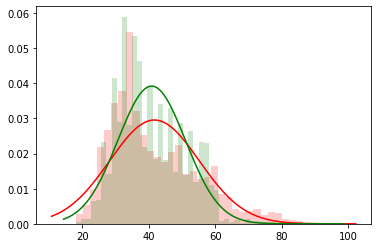

In [109]:
sns.distplot(yes, kde=False, hist_kws = {'color':'r', 'alpha':0.2}, fit_kws={"color":"r"}, fit=stats.norm)
sns.distplot(no, kde=False, hist_kws = {'color':'g', 'alpha':0.2}, fit_kws={"color":"g"}, fit=stats.norm)

In [ ]:
#########################################
############ y변수와 연관성 있는 변수 확인
######### y 변수와 연속형 변수간의 분산분석 

In [141]:
yes2 = bank[bank['y']=='yes'].balance.values
no2 = bank[bank['y']=='no'].balance.values
print(yes2)
print(no2)
stats.f_oneway(yes2,no2)

[2343   45 1270 ...  825 1729 5715]
[2143   29    2 ... 1475  668 2971]


F_onewayResult(statistic=126.57227551143087, pvalue=2.5211136918594683e-29)

In [142]:
yes3 = bank[bank['y']=='yes'].duration.values
no3 = bank[bank['y']=='no'].duration.values
print(yes3)
print(no3)
stats.f_oneway(yes3,no3)

[1042 1467 1389 ...  977  456 1127]
[ 261  151   76 ... 1166  508  361]


F_onewayResult(statistic=8333.761148332413, pvalue=0.0)

In [143]:
yes4 = bank[bank['y']=='yes'].campaign.values
no4 = bank[bank['y']=='no'].campaign.values
print(yes4)
print(no4)
stats.f_oneway(yes4,no4)

[1 1 1 ... 3 2 5]
[1 1 1 ... 3 4 2]


F_onewayResult(statistic=243.35840443473325, pvalue=1.0123473642068786e-54)

In [144]:
yes5 = bank[bank['y']=='yes'].pdays.values
no5 = bank[bank['y']=='no'].pdays.values
print(yes5)
print(no5)
stats.f_oneway(yes5,no5)

[ -1  -1  -1 ...  -1  -1 184]
[ -1  -1  -1 ... 530  -1 188]


F_onewayResult(statistic=490.6965626809246, pvalue=3.79055331945749e-108)

In [145]:
yes6 = bank[bank['y']=='yes'].previous.values
no6 = bank[bank['y']=='no'].previous.values
print(yes6)
print(no6)
stats.f_oneway(yes6,no6)

[0 0 0 ... 0 0 3]
[ 0  0  0 ... 12  0 11]


F_onewayResult(statistic=396.4439894423845, pvalue=7.801830349772383e-88)